In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
data=pd.read_csv("movie_metadata.csv")

#Check what columns I have to decide what I will use
pd.set_option("display.max.columns", None)
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [142]:
# I decided don't use some columns which don't relate to my research.
# Such as: "color, num_critic_for_reviews, director_facebook_likes, actor_3_facebook_likes,...", etc.

# Copying the data to leave original data untouched
data_new = data.copy()
# drop all columns with "like" word
data_new = data_new[data_new.columns.drop(list(data_new.filter(regex="likes")))]
# drop other unnecessary columns
data_new.drop(['color', 'num_critic_for_reviews', "num_voted_users",  "facenumber_in_poster", "movie_imdb_link", "num_user_for_reviews","language", "plot_keywords", "aspect_ratio" ], axis=1, inplace= True)
# check what left
data_new.head(5)

,director_name,duration,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,country,content_rating,budget,title_year,imdb_score
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,USA,PG-13,237000000.0,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,USA,PG-13,300000000.0,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,UK,PG-13,245000000.0,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,USA,PG-13,250000000.0,2012.0,8.5
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,7.1


In [143]:
data_new.shape

(5043, 13)

In [144]:
#check our new data for missing values
data_new.isnull().sum().sort_values(ascending=False)[:10]

gross             884
budget            492
content_rating    303
title_year        108
director_name     104
actor_3_name       23
duration           15
actor_2_name       13
actor_1_name        7
country             5
dtype: int64

In [145]:
# as we can see that 10 columns have missing values
# duration, budget and gross I replace with rounded mean value 
data_new.fillna({'gross':round(data_new.gross.mean()), "budget":round(data_new.budget.mean()), "duration":round(data_new.duration.mean()) }, inplace=True)

In [146]:
# for the missing values in the title_year, content rating and country I replace them with mode (value that appears most often)

data_new.fillna({'content_rating': data_new.content_rating.mode().to_string, 
                 "title_year": data_new.title_year.mode().to_string, 
                 "country": data_new.country.mode().to_string}, inplace=True)

In [147]:
# will drop rows with missing names
data_new.dropna(subset=list(data_new.filter(regex="name")), inplace=True)

In [148]:
# check if we deal with all missing values.
data_new.isnull().sum().sort_values(ascending=False)[:10]

imdb_score        0
title_year        0
budget            0
content_rating    0
country           0
actor_3_name      0
movie_title       0
actor_1_name      0
genres            0
gross             0
dtype: int64

In [149]:
data_new.dtypes

director_name      object
duration          float64
actor_2_name       object
gross             float64
genres             object
actor_1_name       object
movie_title        object
actor_3_name       object
country            object
content_rating     object
budget            float64
title_year         object
imdb_score        float64
dtype: object

In [150]:
# convert datatype of these columns from float to integer 
data_new[['duration', 'gross', 'budget', 'imdb_score']] = data_new[['duration', 'gross', 'budget', 'imdb_score']].astype('int64')

In [151]:
#check data again
data_new.dtypes

director_name     object
duration           int64
actor_2_name      object
gross              int64
genres            object
actor_1_name      object
movie_title       object
actor_3_name      object
country           object
content_rating    object
budget             int64
title_year        object
imdb_score         int64
dtype: object

In [152]:
#find out statistical characteristic of the numeric columns
data_new[["budget"]].describe()

,budget
count,4.919000e+03
mean,3.988788e+07
std,1.982310e+08
min,2.180000e+02
25%,7.000000e+06
50%,2.200000e+07
75%,4.000000e+07
max,1.221550e+10


In [153]:
#calculate Interquartile Range of the data (IQR = q3 — q1) to drop the outliers
IQRb=data_new["budget"].quantile(0.75)-data_new["budget"].quantile(0.25)
IQRg=data_new["gross"].quantile(0.75)-data_new["gross"].quantile(0.25)
print (IQRb, "  ", IQRg)

33000000.0    44456105.5


In [154]:
# acceptable limit for value to concider the data without outliers
# we have outliers only on the upper end
upperLim=data_new["budget"].quantile(0.75)+1.5*IQRb
print(upperLim)
upperLimG=data_new["gross"].quantile(0.75)+1.5*IQRg
print(upperLimG)

89500000.0
119246421.75


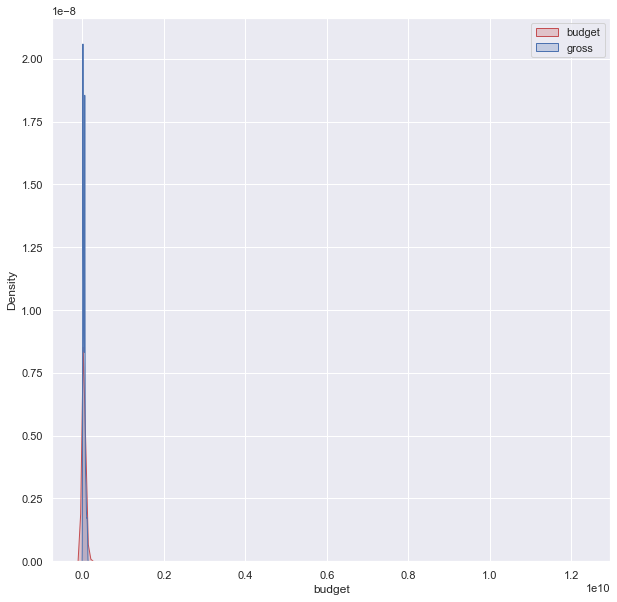

In [155]:
# I decided don't consider values that are outliers
# plot graph of Density to visualize the range of what value will be considering
df = data_new.loc[(data_new["budget"] > 1000) & (data_new["gross"] <= upperLimG)]
plt.figure(figsize=(10,10))

sns.set(style="darkgrid")
fig = sns.kdeplot(df['budget'], shade=True, color="r", label='budget')
fig = sns.kdeplot(df['gross'], shade=True, color="b", label='gross')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

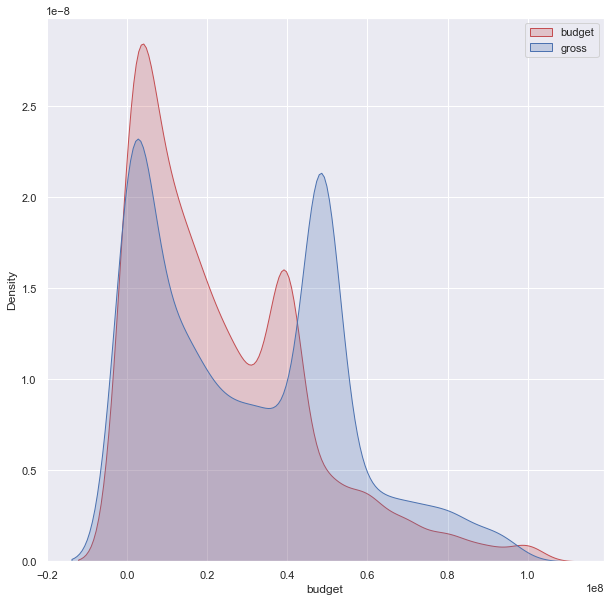

In [156]:
#since the graph still doesn't readable, I decided to add an extra limit to the boundary
df=data_new.loc[data_new['gross'] <= 0.1*(10**9)]
df=df.loc[df['budget'] <= 0.1*(10**9)]
plt.figure(figsize=(10,10))


sns.set(style="darkgrid")
fig = sns.kdeplot(df['budget'], shade=True, color="r", label='budget')
fig = sns.kdeplot(df['gross'], shade=True, color="b", label='gross')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

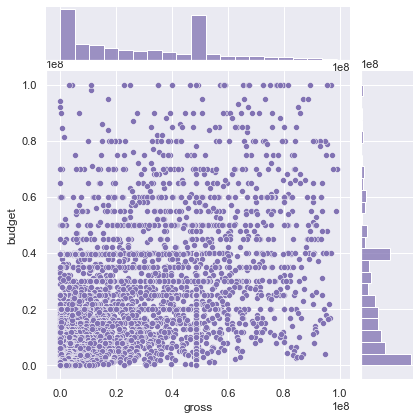

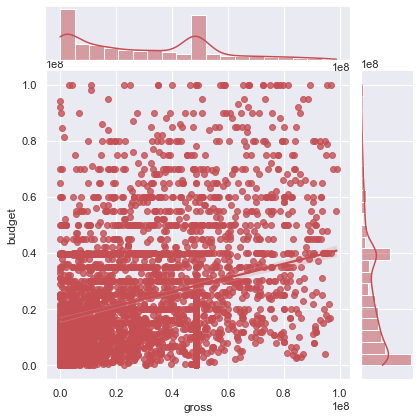

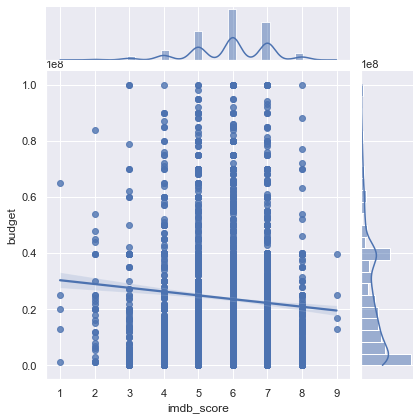

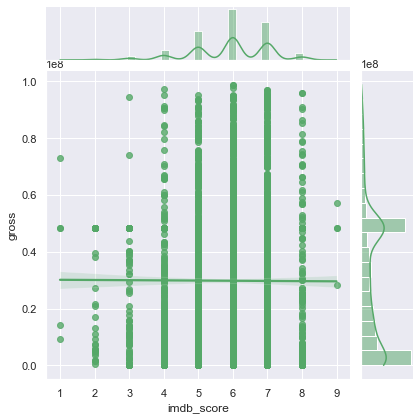

In [157]:
# To be able to see dependencie between budget and gross I choosed value within 
# 0 to 0.1*10^9 for budget and 0 to 0.2*10^9 for gross

sns.jointplot(x=df["gross"], y=df["budget"], kind='scatter', color="m")
sns.jointplot(x=df["gross"], y=df["budget"], kind='reg', color="r")
sns.jointplot(x=df["imdb_score"], y=df["budget"],  kind='reg', color="b")
sns.jointplot(x=df["imdb_score"], y=df["gross"], kind='reg', color="g")


plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

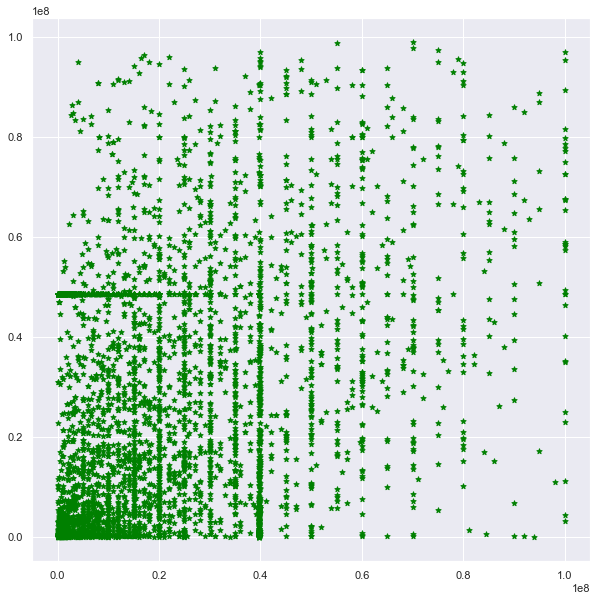

In [158]:
# I plot scatter plot for Budget and gross separately to be able to see data spreading
plt.figure(figsize=(10,10))
x= df['budget']
y= df['gross']
plt.scatter (x, y, label= "stars", color= "green", marker= "*", s=30)
plt.show

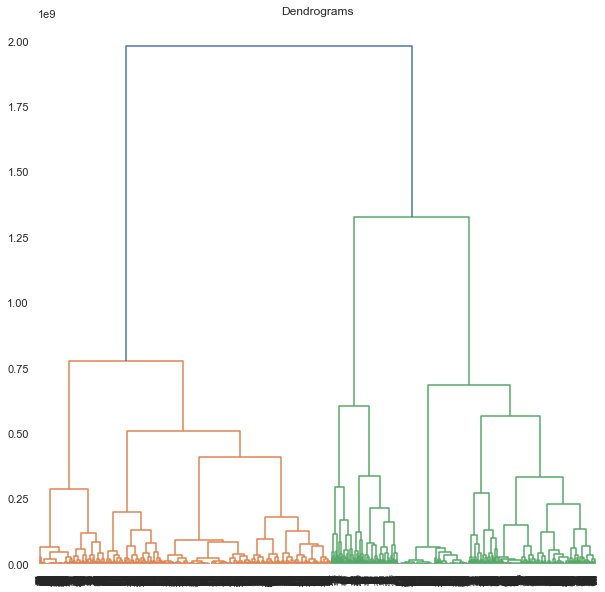

In [92]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 10))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(dfX, method='ward'))

In [120]:
#plot data with seaborn (don't add a legend yet)
from sklearn.cluster import KMeans
%matplotlib inline   
#build clastering model

dfX=pd.DataFrame(df, columns=["budget", "gross"])
dfX=dfX.to_numpy()
kmeans=KMeans(n_clusters=3)
kmeans.fit(dfX)
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

print(centroids)

[[12110943.15137256 49435188.36078429]
 [55037670.14557691 50652683.7054871 ]
 [17232114.9609375   8461842.79150385]]


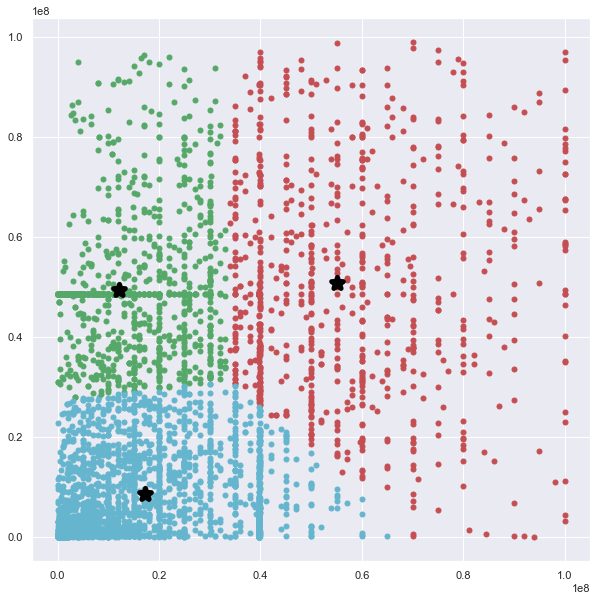

In [121]:
colors=["g.", "r.", "c."]
plt.figure(figsize=(10,10))
for i in range(len(dfX)):
    plt.plot(dfX[i][0], dfX[i][1], colors[labels[i]], markersize=10)
    
plt.scatter(centroids[:,0], centroids[:, 1], c="black", marker="*", s=150, linewidths=5, zorder=10)
plt.show()
